In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install basemap-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate

In [ ]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import networkx as nx
import networkx.algorithms.community as nxcom
import networkx.algorithms.approximation as nxapp
from community import community_louvain
from collections import Counter
# import graph_tool.all as gt

In [ ]:
# load network
# g = gt.collection.ns["eu_airlines"]
G = nx.read_graphml('/content/drive/MyDrive/Colab Notebooks/network.xml')

# Sublayers of airlines

## Divide flights into 37 sublayers of airlines

In [ ]:
# layer key for airlines
layer_key  = {1: 'Lufthansa', 2: 'Ryanair', 3: 'Easyjet', 4: 'British_Airways', 5: 'Turkish_Airlines', 6: 'Air_Berlin', 7: 'Air_France', 8: 'Scandinavian_Airlines', 9: 'KLM', 10: 'Alitalia', 11: 'Swiss_International_Air_Lines', 12: 'Iberia', 13: 'Norwegian_Air_Shuttle', 14: 'Austrian_Airlines', 15: 'Flybe', 16: 'Wizz_Air', 17: 'TAP_Portugal', 18: 'Brussels_Airlines', 19: 'Finnair', 20: 'LOT_Polish_Airlines', 21: 'Vueling_Airlines', 22: 'Air_Nostrum', 23: 'Air_Lingus', 24: 'Germanwings', 25: 'Panagra_Airways', 26: 'Netjets', 27: 'Transavia_Holland', 28: 'Niki', 29: 'SunExpress', 30: 'Aegean_Airlines', 31: 'Czech_Airlines', 32: 'European_Air_Transport', 33: 'Malev_Hungarian_Airlines', 34: 'Air_Baltic', 35: 'Wideroe', 36: 'TNT_Airways', 37: 'Olympic_Air'}

## Get graph of each airlines

In [ ]:
# generate sublayer graphs
layer = {}
data = []
col_names = ["Airline", "Node", "Edge"]
for i in range(37):
  g = nx.Graph()
  edges = [(u, v) for u,v,e in G.edges(data=True) if e['layer'] == i+1]
  for e in edges:  
    u,v = e[0], e[1]
    if not (u in g.nodes()):
      g.add_node(u, name = G.nodes[u]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    if not (v in g.nodes()):
      g.add_node(v, name = G.nodes[v]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    g.add_edge(u, v)
  # Relabel
  d = {n:g.nodes[n]["name"] for n in g.nodes()}
  g = nx.relabel_nodes(g, d)
  al_name = layer_key[i+1]

  node_edge = [al_name, g.number_of_nodes(), g.number_of_edges()]
  data.append(node_edge)
  layer[al_name] = g

## Statistics of each Airline
### Statistics table for 37 airlines, sort by edge

In [ ]:
# Statistics of each Airline
data = sorted(data, key = lambda x: x[2], reverse = True)
print(tabulate(data, headers=col_names, tablefmt="grid"))

+-------------------------------+--------+--------+
| Airline                       |   Node |   Edge |
+===============================+========+========+
| Ryanair                       |    128 |    601 |
+-------------------------------+--------+--------+
| Easyjet                       |     99 |    307 |
+-------------------------------+--------+--------+
| Lufthansa                     |    106 |    244 |
+-------------------------------+--------+--------+
| Air_Berlin                    |     75 |    184 |
+-------------------------------+--------+--------+
| Netjets                       |     94 |    180 |
+-------------------------------+--------+--------+
| Turkish_Airlines              |     86 |    118 |
+-------------------------------+--------+--------+
| Scandinavian_Airlines         |     66 |    110 |
+-------------------------------+--------+--------+
| Flybe                         |     43 |     99 |
+-------------------------------+--------+--------+
| Alitalia  

EHAM: 156 Amsterdam
LEMD: 152 Mardrid
EDDM: 139 Munich 
LEBL: 137 Barcelona
EDDF: 127 Frankfurt
EGKK: 124 Gatwick
LOWW: 122 Vienna
LIRF: 119 Lazio 
LFPG: 118 Paris
EGSS: 118 London

Ryanair(601), Easyjet(307), Lufthansa(244) are top three airlines with highest edges.\
Ryanair(128), Lufthansa(106), Easyjet(99) are the top three airlines with highest nodes, same with result of edges.

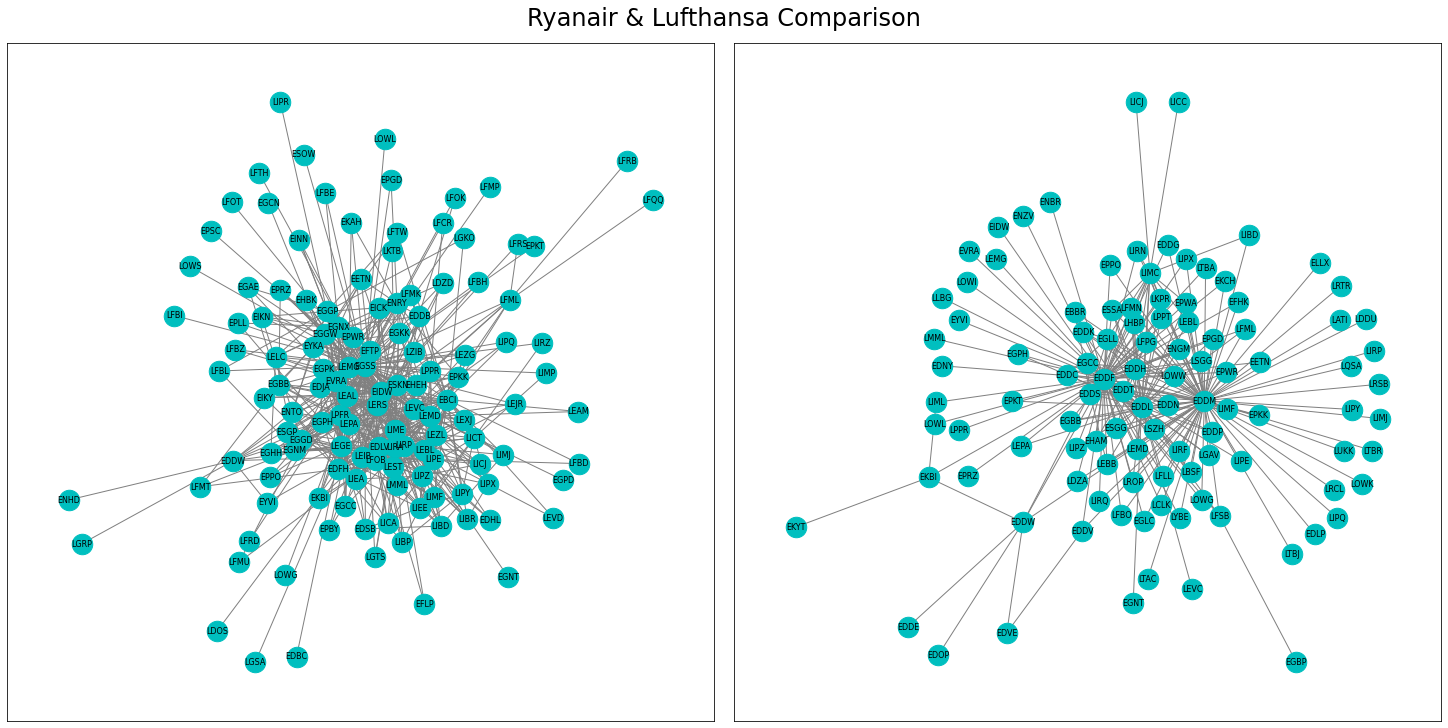

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10),constrained_layout=True)

Luft = layer['Lufthansa']
Ryan = layer['Ryanair']

nx.draw_networkx(Luft, with_labels = True, pos = nx.spring_layout(Luft),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax2)
nx.draw_networkx(Ryan, with_labels = True, pos = nx.spring_layout(Ryan),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax1)

plt.suptitle('Ryanair & Lufthansa Comparison', fontsize=24)
plt.savefig('nw_RyLu.pdf')
plt.show()

Representation of the networks corresponding to Ryanair (Left) and Lufthansa (Right), as of 2011. The network of Lufthansa, which is a major airline, is centered around few main airports (hubs), while the structure of Ryanair, the biggest European low-cost company, has a densely connected core.

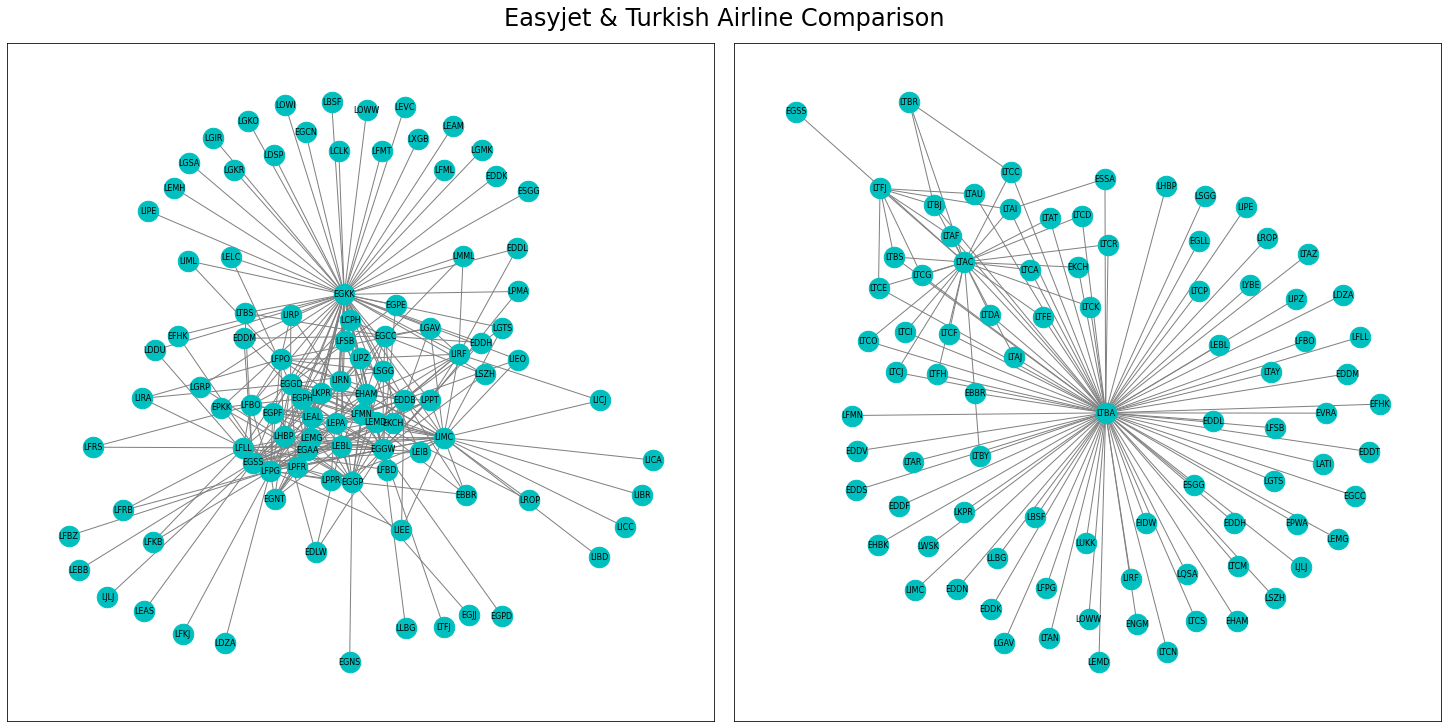

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10),constrained_layout=True)

Easyjet = layer['Easyjet']
Turkey = layer['Turkish_Airlines']

nx.draw_networkx(Easyjet, with_labels = True, pos = nx.spring_layout(Easyjet),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax1)
nx.draw_networkx(Turkey, with_labels = True, pos = nx.spring_layout(Turkey),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax2)

plt.suptitle('Easyjet & Turkish Airline Comparison', fontsize=24)
plt.savefig('nw_EjTk.pdf')
plt.show()

Representation of the networks corresponding to Easyjet (Left) and Turish Airline (Right), as of 2011. The network of Turkish, which is another major airline, is centered around few main airports (hubs), while the structure of Easyjet, the third biggest European low-cost company, has a densely connected core.

So both pairs show similar results.

# Regional and Local airlines
## Find top hubs of each airline

In [ ]:
def hub(airline, num):
  g = layer[airline]
  degree_list = sorted(g.degree, key=lambda x: x[1], reverse=True)

  for i,v in degree_list[:num]:
      node = g.nodes[i]['name']
      print(f'{node}: {v}')

## Calculate dominance of the most powerful hubs


In [ ]:
# calculate percentage as highest degree centrality of airport divide by sum of top three airports' degree centrality
def highest_deg_per(airline):
  g = layer[airline]

  degree_list = sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)

  i,v = degree_list[0]
  highest = g.nodes[i]['name']

  per = v/sum([v for (i,v) in degree_list[:3]])

  return highest, per

## Classify airlines into two categories: local and regional

In [ ]:
# if the percentage exceeds 0.7, it is defined as local, otherwise regional
local, regional = {}, {}
for i in layer_key.keys():
  airline = layer_key[i]
  highest, per = highest_deg_per(airline)
  if per >= 0.7:
    local[airline] =  per
  else:
    regional[airline] = per
local_air = sorted(local.items(), key=lambda x: x[1], reverse = True)
regional_air = sorted(regional.items(), key=lambda x: x[1])

## Table of local airlines and regional airlines

In [ ]:
#List of local and regional airlines
print(f'Local airlines: \n{[i for (i, p) in local_air]}\n')
print(f'Regional airlines: \n{[i for (i,p) in regional_air]}')

Local airlines: 
['KLM', 'Brussels_Airlines', 'Czech_Airlines', 'Malev_Hungarian_Airlines', 'Air_Baltic', 'Finnair', 'Iberia', 'Austrian_Airlines', 'TNT_Airways', 'Air_France', 'LOT_Polish_Airlines', 'Olympic_Air', 'Swiss_International_Air_Lines', 'Air_Lingus', 'TAP_Portugal', 'Turkish_Airlines']

Regional airlines: 
['Wideroe', 'Air_Berlin', 'Wizz_Air', 'SunExpress', 'Lufthansa', 'Netjets', 'Flybe', 'Scandinavian_Airlines', 'Niki', 'Ryanair', 'Easyjet', 'Air_Nostrum', 'Norwegian_Air_Shuttle', 'Transavia_Holland', 'Germanwings', 'Alitalia', 'Aegean_Airlines', 'European_Air_Transport', 'Panagra_Airways', 'Vueling_Airlines', 'British_Airways']


In [ ]:
print(tabulate(local_air, headers=col_names, tablefmt="grid"))

+-------------------------------+----------+
| Airline                       |     Node |
+===============================+==========+
| KLM                           | 0.96875  |
+-------------------------------+----------+
| Brussels_Airlines             | 0.955556 |
+-------------------------------+----------+
| Czech_Airlines                | 0.953488 |
+-------------------------------+----------+
| Malev_Hungarian_Airlines      | 0.944444 |
+-------------------------------+----------+
| Air_Baltic                    | 0.911111 |
+-------------------------------+----------+
| Finnair                       | 0.909091 |
+-------------------------------+----------+
| Iberia                        | 0.891892 |
+-------------------------------+----------+
| Austrian_Airlines             | 0.876712 |
+-------------------------------+----------+
| TNT_Airways                   | 0.833333 |
+-------------------------------+----------+
| Air_France                    | 0.806452 |
+---------

In [ ]:
print(tabulate(regional_air, headers=col_names, tablefmt="grid"))

+------------------------+----------+
| Airline                |     Node |
+========================+==========+
| Wideroe                | 0.375    |
+------------------------+----------+
| Air_Berlin             | 0.376238 |
+------------------------+----------+
| Wizz_Air               | 0.384615 |
+------------------------+----------+
| SunExpress             | 0.393939 |
+------------------------+----------+
| Lufthansa              | 0.395939 |
+------------------------+----------+
| Netjets                | 0.4      |
+------------------------+----------+
| Flybe                  | 0.40678  |
+------------------------+----------+
| Scandinavian_Airlines  | 0.43299  |
+------------------------+----------+
| Niki                   | 0.461538 |
+------------------------+----------+
| Ryanair                | 0.464481 |
+------------------------+----------+
| Easyjet                | 0.531746 |
+------------------------+----------+
| Air_Nostrum            | 0.561404 |
+-----------

## Draw geographic distribution of top two airlines in two categories separately

In [ ]:
# draw two flights on map
def draw_flight(al_names):
  g1 = layer[al_names[0]]
  g2 = layer[al_names[1]]
  fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10),constrained_layout=True)
  map = Basemap(projection='merc', resolution='c',
                llcrnrlat=20, urcrnrlat=75,
                llcrnrlon=-35, urcrnrlon=55,)
  pos = {}
  for n in g1.nodes():
      x,y = map(g1.nodes[n]['nodeLong'], g1.nodes[n]['nodeLat'])
      pos[n] = (x,y)

  # draw map
  map.bluemarble(alpha=0.6,ax=ax1)
  # map.shadedrelief()
  nx.draw_networkx(g1, pos=pos, node_size=50, edge_color='b', node_color='pink',
                  arrows=False, with_labels=False, alpha=1, width=0.5, node_shape='.',ax=ax1)
  
  pos = {}
  for n in g2.nodes():
      x,y = map(g2.nodes[n]['nodeLong'], g2.nodes[n]['nodeLat'])
      pos[n] = (x,y)

  # draw map
  map.bluemarble(alpha=0.6,ax = ax2)
  # map.shadedrelief()
  nx.draw_networkx(g2, pos=pos, node_size=50, edge_color='b', node_color='pink',
                  arrows=False, with_labels=False, alpha=1, width=0.5, node_shape='.',ax=ax2)
  plt.suptitle(f'{al_names[0]} (left) and {al_names[1]} (right) Flights')
  plt.savefig(f'geo_{al_names}.pdf')
  plt.show()

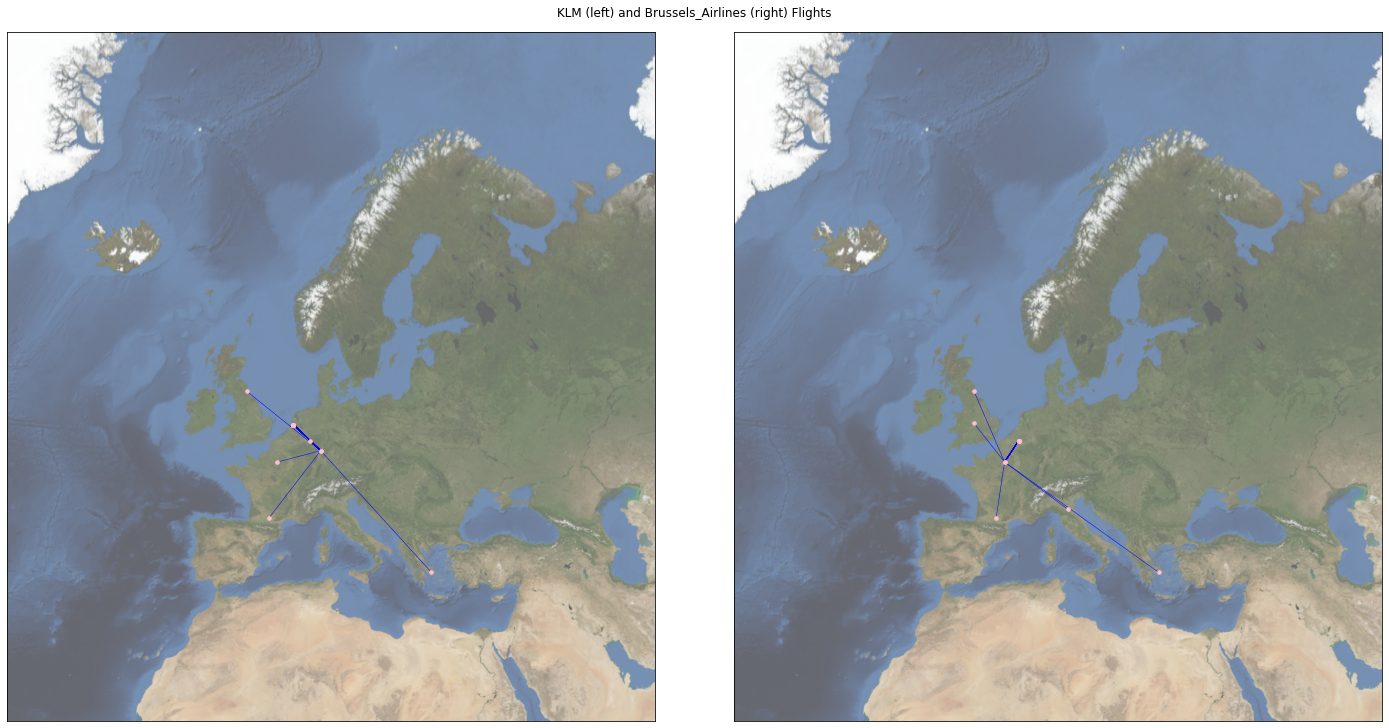

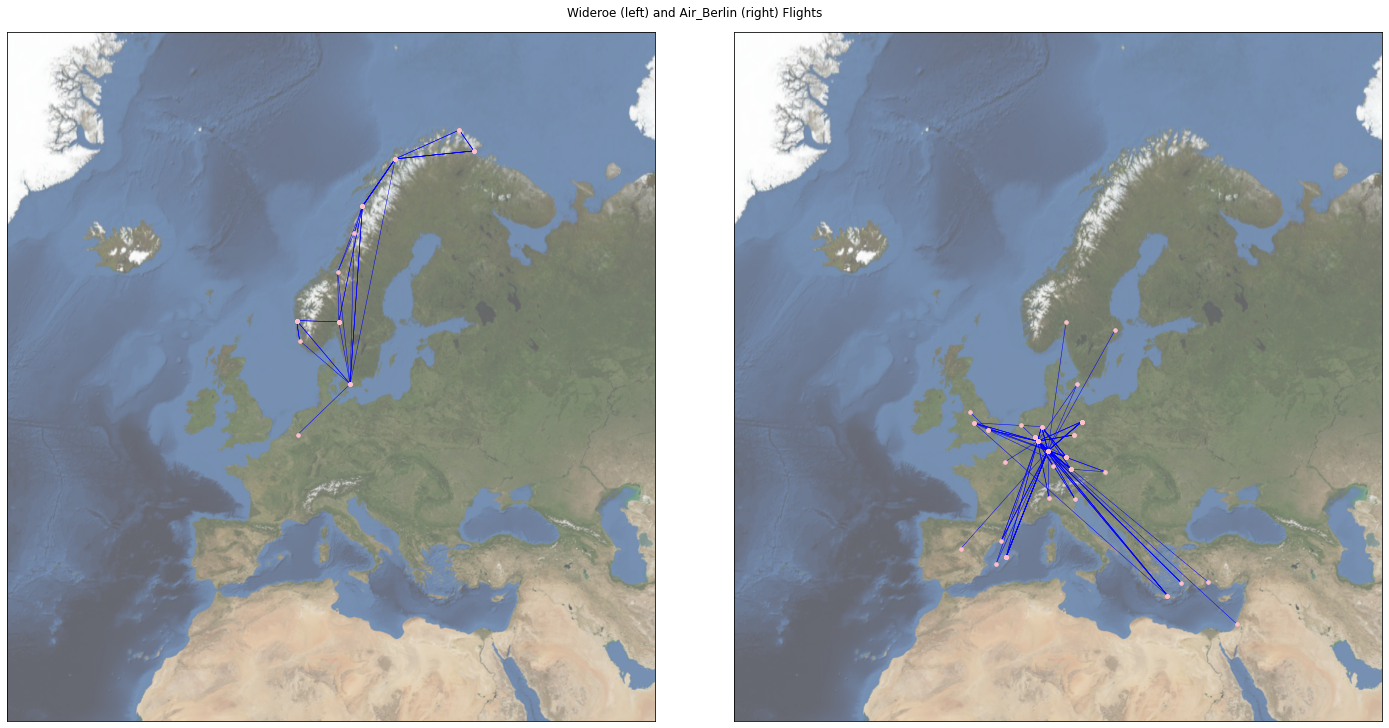

In [ ]:
# draw top two local airlines
draw_flight(['KLM', 'Brussels_Airlines'])
# draw top two regional airlines
draw_flight(['Wideroe', 'Air_Berlin'])

In [ ]:
#find top three hubs in KLM
hub('KLM',3)

EHAM: 62
EDDF: 1
EDDK: 1


In [ ]:
#find top three hubs in Brussels_Airlines
hub('Brussels_Airlines',3)

EBBR: 43
LFPG: 1
LFBO: 1


In [ ]:
#find top three hubs in Wideroe
hub('Wideroe',3)

ENBO: 12
ENTC: 11
ENVA: 9


In [ ]:
#find top three hubs in Air_Berlin
hub('Air_Berlin',3)

EDDL: 38
EDDT: 37
LEPA: 26


We found that the two most typical local airlines are KLM and Brussels_Airlines.
The most important airport of KLM is EHAM,located in Amsterdam, whereas the dominant airport of Brussels_Airlines is EBBR in Brussels. Two of the top three airports of Air_Berlin are in Germany, and the rest is in Spain. All of the top three airports of Wideroe are in Norway.